In [40]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats
import csv

Dos_file1 = 'counts_Data/dos_led_back.txt'
Dos_file2 = 'counts_Data/dos_osl.txt'

salt_file1 = 'counts_Data/salt_led_back.txt'
salt_file2 = 'counts_Data/salt_osl.txt'

smr_file1 = 'counts_Data/smr_led_back.txt'
smr_file2 = 'counts_Data/smr_osl.txt'



def parse_txt(data_file):
    times = []
    counts = []
    with open(data_file, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            times.append(float(row[0]))
            counts.append(float(row[1]))
    return [times, counts]

Dos_data1 = parse_txt(Dos_file1)
Dos_times1 = list((np.array(Dos_data1[0]) * 1e-3) - Dos_data1[0][0] * 1e-3)
Dos_counts_back = list(np.array(Dos_data1[1]) - Dos_data1[1][0])

Dos_data2 = parse_txt(Dos_file2)
Dos_times2 = list((np.array(Dos_data2[0]) * 1e-3) - Dos_data2[0][0] * 1e-3)
Dos_counts_osl = list(np.array(Dos_data2[1]) - Dos_data2[1][0])

Dos_osl_noback = np.zeros(len(Dos_counts_osl))
for i in range(len(Dos_counts_osl)):
     Dos_osl_noback[i] += Dos_counts_osl[i] - Dos_counts_back[i]

data3 = parse_txt(salt_file1)
times3 = list((np.array(data3[0]) * 1e-3) - data3[0][0] * 1e-3)
counts3 = list(np.array(data3[1]) - data3[1][0])

data4 = parse_txt(salt_file2)
times4 = list((np.array(data4[0]) * 1e-3) - data4[0][0] * 1e-3)
counts4 = list(np.array(data4[1]) - data4[1][0])

smrdataback = parse_txt(smr_file1)
smrbacktimes = list((np.array(smrdataback[0]) * 1e-3) - smrdataback[0][0] * 1e-3)
smrback = list(np.array(smrdataback[1]) - smrdataback[1][0])

smrosldata = parse_txt(smr_file2)
smrtimes = list((np.array(smrosldata[0]) * 1e-3) - smrosldata[0][0] * 1e-3)
smrosl = list(np.array(smrosldata[1]) - smrosldata[1][0])

smr_osl_noback = np.zeros(len(smrback))
for i in range(len(smrback)):
     smr_osl_noback[i] += smrosl[i] - smrback[i]

def chi2 (modelvalues, data, errors):
    chisq = 0
    for i in range(len(data)):
        chisq += ((data[i]-modelvalues[i])**2)/errors**2
    Dof = len(data) - 1 # 1 parameter, the gradient of the line
    reducedchi2 = chisq/Dof
    print( 'Reduced chi squared = ' + str(reducedchi2))
    return reducedchi2

def bestfit(times, OSL):
    params = np.polyfit(times, OSL, 1)
    line = params [1] + params[0]*np.array(times)
    plt.plot(times, line)
    return line

Reduced chi squared = 0.13452076522288278


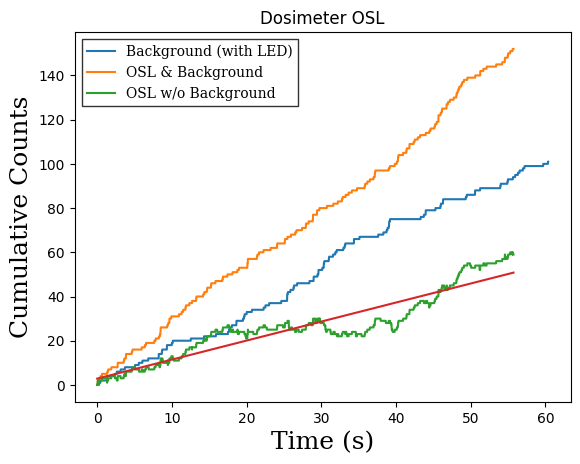

In [27]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

plt.plot(Dos_times1, Dos_counts_back, label='Background (with LED)')
plt.plot(Dos_times2, Dos_counts_osl, label='OSL & Background')
plt.plot(Dos_times2, Dos_osl_noback, label='OSL w/o Background')
plt.legend(prop={'family': 'serif'}, edgecolor = "black", fancybox=False)
plt.xlabel('Time (s)', fontdict=font)
plt.ylabel('Cumulative Counts', fontdict=font)
plt.title('Dosimeter OSL')
bestfitDos = bestfit(Dos_times2, Dos_osl_noback)
chi2(bestfitDos, Dos_osl_noback, statistics.stdev(Dos_osl_noback))
# plt.savefig(fname = my_file_name)
plt.show()

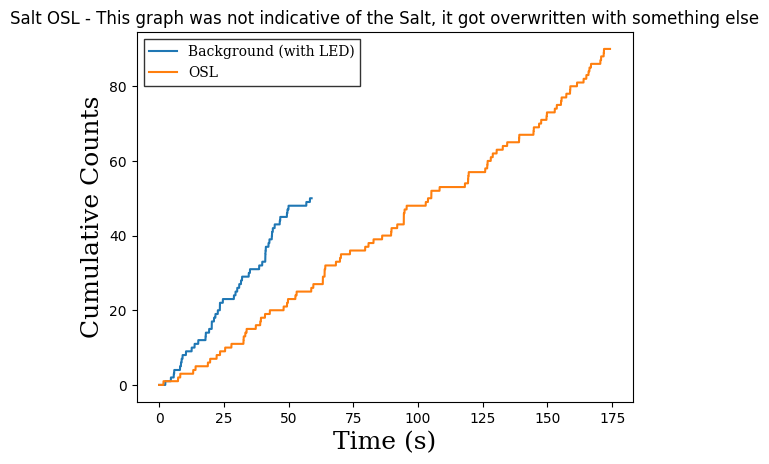

In [ ]:
#This graph was not indicative of the Salt, it got overwritten with something else
plt.plot(times3, counts3, label='Background (with LED)')
plt.plot(times4, counts4, label='OSL')
plt.legend(prop={'family': 'serif'}, edgecolor = "black", fancybox=False)
plt.xlabel('Time (s)', fontdict=font)
plt.ylabel('Cumulative Counts', fontdict=font)
plt.title('Salt OSL - This graph was not indicative of the Salt, it got overwritten with something else')
plt.show()

Reduced chi squared = 0.8291298217886833


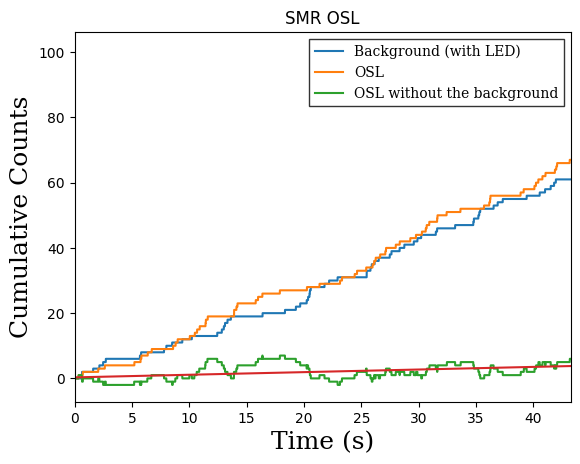

In [46]:
plt.plot(smrbacktimes, smrback, label='Background (with LED)')
plt.plot(smrtimes, smrosl, label='OSL')
plt.plot(smrbacktimes, smr_osl_noback, label ='OSL without the background')
bestfitsmr = bestfit(smrbacktimes, smr_osl_noback)
chi2(bestfitsmr, smr_osl_noback, statistics.stdev(smr_osl_noback))
plt.xlim(0, smrbacktimes[-1])
plt.legend(prop={'family': 'serif'}, edgecolor = "black", fancybox=False)
plt.xlabel('Time (s)', fontdict=font)
plt.ylabel('Cumulative Counts', fontdict=font)
plt.title('SMR OSL')
plt.show()

In [15]:
print(Dos_times2)

[np.float64(0.0), np.float64(0.009999999999990905), np.float64(0.01999999999998181), np.float64(0.03100000000000591), np.float64(0.04099999999999682), np.float64(0.05099999999998772), np.float64(0.06099999999997863), np.float64(0.07099999999996953), np.float64(0.08100000000001728), np.float64(0.09100000000000819), np.float64(0.10099999999999909), np.float64(0.11099999999999), np.float64(0.1209999999999809), np.float64(0.1309999999999718), np.float64(0.14100000000001955), np.float64(0.15100000000001046), np.float64(0.16199999999997772), np.float64(0.17199999999996862), np.float64(0.18200000000001637), np.float64(0.19200000000000728), np.float64(0.20199999999999818), np.float64(0.21199999999998909), np.float64(0.22199999999998), np.float64(0.2319999999999709), np.float64(0.24200000000001864), np.float64(0.25200000000000955), np.float64(0.26200000000000045), np.float64(0.27199999999999136), np.float64(0.28300000000001546), np.float64(0.29300000000000637), np.float64(0.3039999999999736), n